In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA
---

### 1. Load dataset

In [81]:
iris_df = pd.read_csv('iris.csv')
iris_df.drop(columns='Id',inplace=True)

### 2. Statistics

In [82]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Thnhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thnhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thnhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thnhan\anaconda3\li

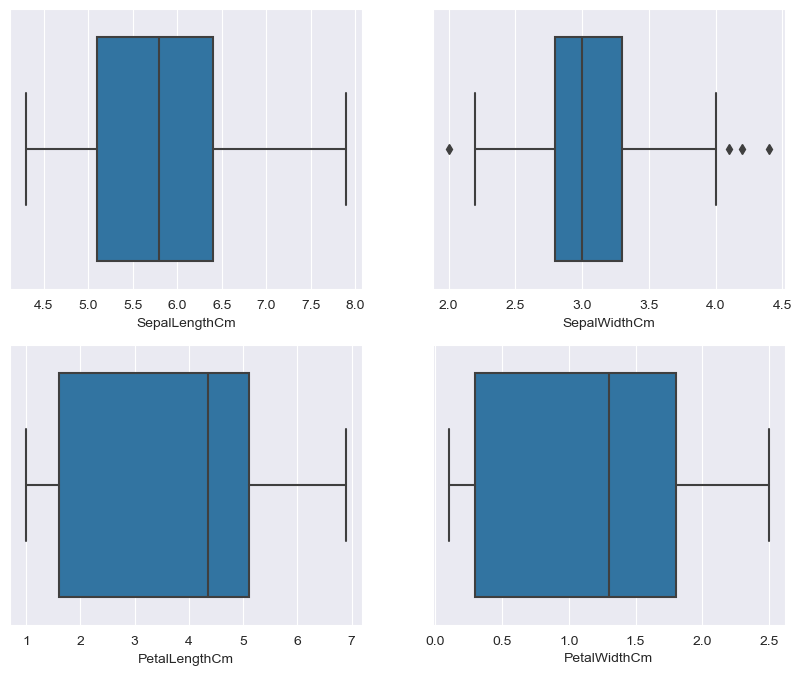

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
ax = ax.flatten()
cols = iris_df.columns[:-1]
for i, col in enumerate(cols):
    sns.boxplot(iris_df[col], ax = ax[i])
plt.axis('tight');

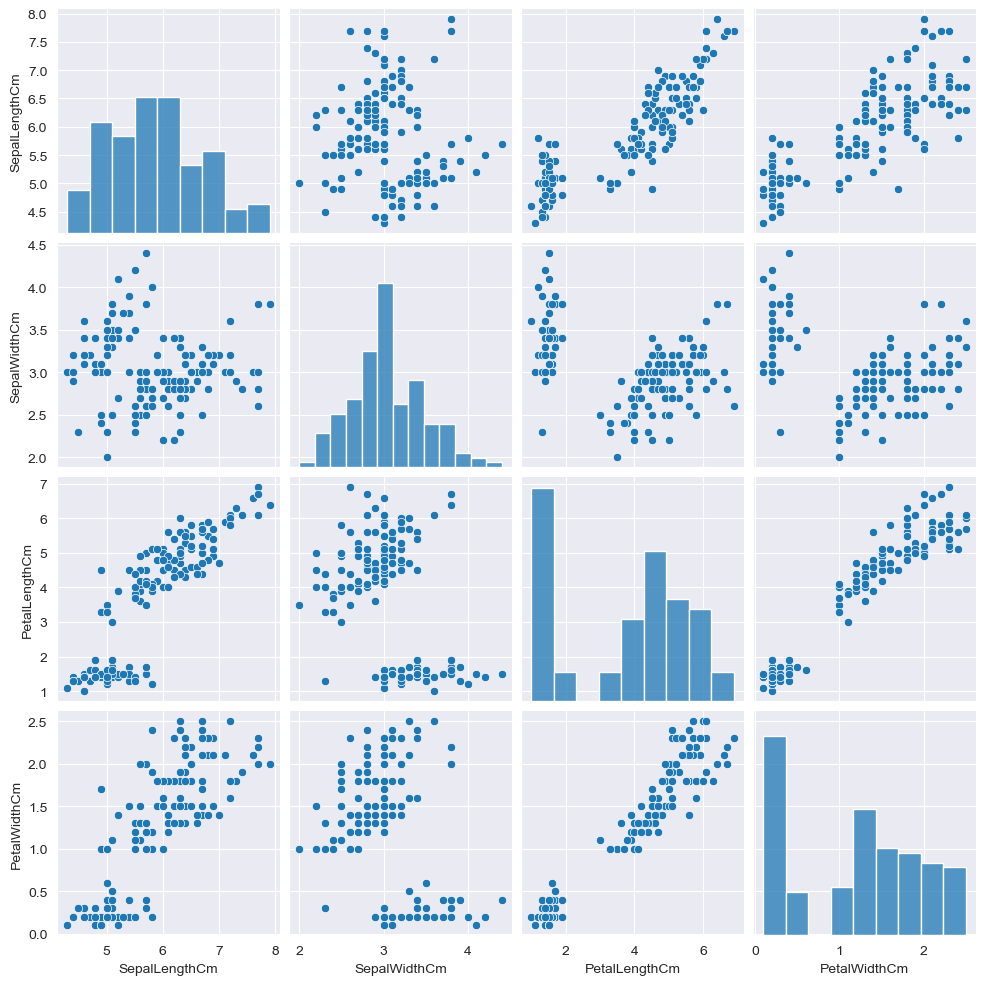

In [84]:
sns.pairplot(iris_df);

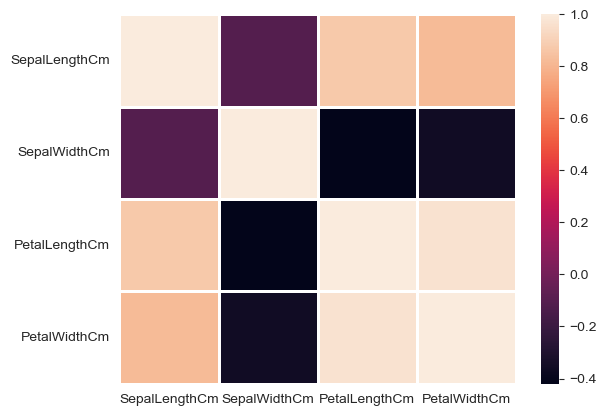

In [85]:
sns.heatmap(iris_df.corr(), linewidth = 1);

## Way 1: Use sklearn library
---

### 1. Import libraries

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 2. Split dataset into train and test set

In [87]:
X = iris_df.iloc[:,:4]
y = iris_df.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### 3. Normalize features

In [88]:
scaler = StandardScaler()
scaler.fit(X_train);

In [89]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 4. Using sklearn knn model

In [90]:
knn_classifier = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree', weights='distance')
knn_classifier.fit(X_train, y_train);

### 5. Predict

In [91]:
y_predict = knn_classifier.predict(X_test)

### 6. Evaluate

In [92]:
print(round(accuracy_score(y_predict,y_test),2))

1.0


In [93]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Way 2: User-defined
---

### 1. Import libraries

In [94]:
import numpy as np
import csv

### 2. Load dataset

In [95]:
file = open('iris.csv','r')
iris_arr = np.array(list(csv.reader(file)))[1:,1:]

In [96]:
iris_arr

array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
       ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
       ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
       ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
       ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
       ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
       ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
       ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
       ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
       ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
       ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
       ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
       ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
       ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
       ['5.1

### 3. Split dataset into train and test set

In [97]:
np.random.shuffle(iris_arr)
X = iris_arr[:,:4].astype('float')
y = iris_arr[:,4]

In [98]:
prop = 0.2
threshold = round(len(iris_arr) * prop)
X_test = X[:threshold]
X_train = X[threshold:]
y_test = y[:threshold]
y_train = y[threshold:]

### 4. Normalize features

In [99]:
X_mean = X_train.mean(axis = 0)
X_std = X_train.std(axis = 0)
print(f'Mean: {X_mean} \n Std: {X_std}')

Mean: [5.81       3.06583333 3.69583333 1.165     ] 
 Std: [0.82284061 0.42553806 1.76159945 0.74951651]


In [100]:
def normalize(features):
    return (features - X_mean) / X_std

In [101]:
X_train = np.apply_along_axis(normalize, axis = 1, arr = X_train)
X_test = np.apply_along_axis(normalize, axis = 1, arr = X_test)

In [102]:
X_train[:5]

array([[-0.37674368,  2.66525319, -1.30326637, -1.28749665],
       [-0.86286456,  0.55028372, -1.13296659, -0.88723863],
       [ 0.59549808,  0.78528033,  1.08093055,  1.64772888],
       [-0.13368324, -0.1547061 ,  0.28619824,  0.04669677],
       [-0.74133434,  1.02027694, -1.24649978, -1.28749665]])

In [103]:
X_test[:5]

array([[ 2.29692115, -0.62469931,  1.70536308,  1.11405151],
       [ 0.47396786,  0.78528033,  0.96739736,  1.51430954],
       [ 0.59549808,  0.55028372,  1.30799692,  1.78114822],
       [-0.01215302, -0.62469931,  0.79709758,  1.64772888],
       [ 0.96008874, -0.38970271,  0.51326462,  0.18011611]])

### 5. Create model's functions

In [104]:
def distance(point1, point2, q):
    return (np.sum((point1 - point2) ** q)) ** (1/q)

In [105]:
def nearest_neighbors(X, k):
    dict = {'Distance' : [],
            'Label' : []}
    for features, label in zip(X_train, y_train):
        dict['Distance'].append(distance(X,features,2))
        dict['Label'].append(label)
    tuple = list(zip(dict['Distance'],dict['Label']))
    sorted_tuple = sorted(tuple)
    k_nearest = [x[1] for x in sorted_tuple[:k]]
    max = 0
    label = ''
    for lab in set(k_nearest):
        count = k_nearest.count(lab)
        if count > max:
            max = count
            label = lab
    return label

In [106]:
def predict(X_test, k):
    return [nearest_neighbors(x,k) for x in X_test]

### 6. Predict

In [110]:
k = 6
y_pred = predict(X_test,k)
print(y_pred)

['Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica']


### 7. Evaluate

In [111]:
total = len(y_test)
correct = np.sum((y_pred == y_test))
accuracy = round(correct/total,2)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
